In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [365]:
# 生成数据
def gen_data(x1):
    y = np.sin(x1) 
    return y
def load_data():
    x1 = np.linspace(1/3*math.pi, 5/3*math.pi, 50)
    data_train =gen_data(x1) + np.random.randn(50) * 0.2
    #data_train =[gen_data(x1)  for x1 in x1]
    return x1,data_train

[-0.59493667]
[-0.5836383  -0.00561324]
[ 2.61778774 -1.10594505  0.11533719]
[ 0.33887448  0.05091374 -0.13969209  0.02042034]
[ 6.2047477  -3.66938857  0.94651253 -0.12522559  0.00711927]
[ 2.32643892 -1.3346713   0.59987305 -0.24622859  0.0497036  -0.003522  ]
[-5.13733308e+01  6.11533064e+01 -3.80663350e+01  1.34780602e+01
 -2.74666708e+00  3.00062798e-01 -1.35908685e-02]
[-1.02584336e+02  1.48803503e+02 -1.13967304e+02  5.09395746e+01
 -1.37375563e+01  2.19507639e+00 -1.90678133e-01  6.91147211e-03]
[ 7.79393109e+02 -1.28744798e+03  1.19183472e+03 -6.80901332e+02
  2.49217544e+02 -5.85667318e+01  8.54348678e+00 -7.03881565e-01
  2.50202091e-02]
[ 1.21134137e+03 -2.32362260e+03  2.52782052e+03 -1.72983520e+03
  7.80014726e+02 -2.35410994e+02  4.70985193e+01 -5.99599735e+00
  4.39841767e-01 -1.41544415e-02]
[ 1.62435141e+03 -3.50832235e+03  4.42870390e+03 -3.61600129e+03
  1.99984985e+03 -7.63512790e+02  2.01216531e+02 -3.59044652e+01
  4.13746760e+00 -2.77630258e-01  8.23440099e-03

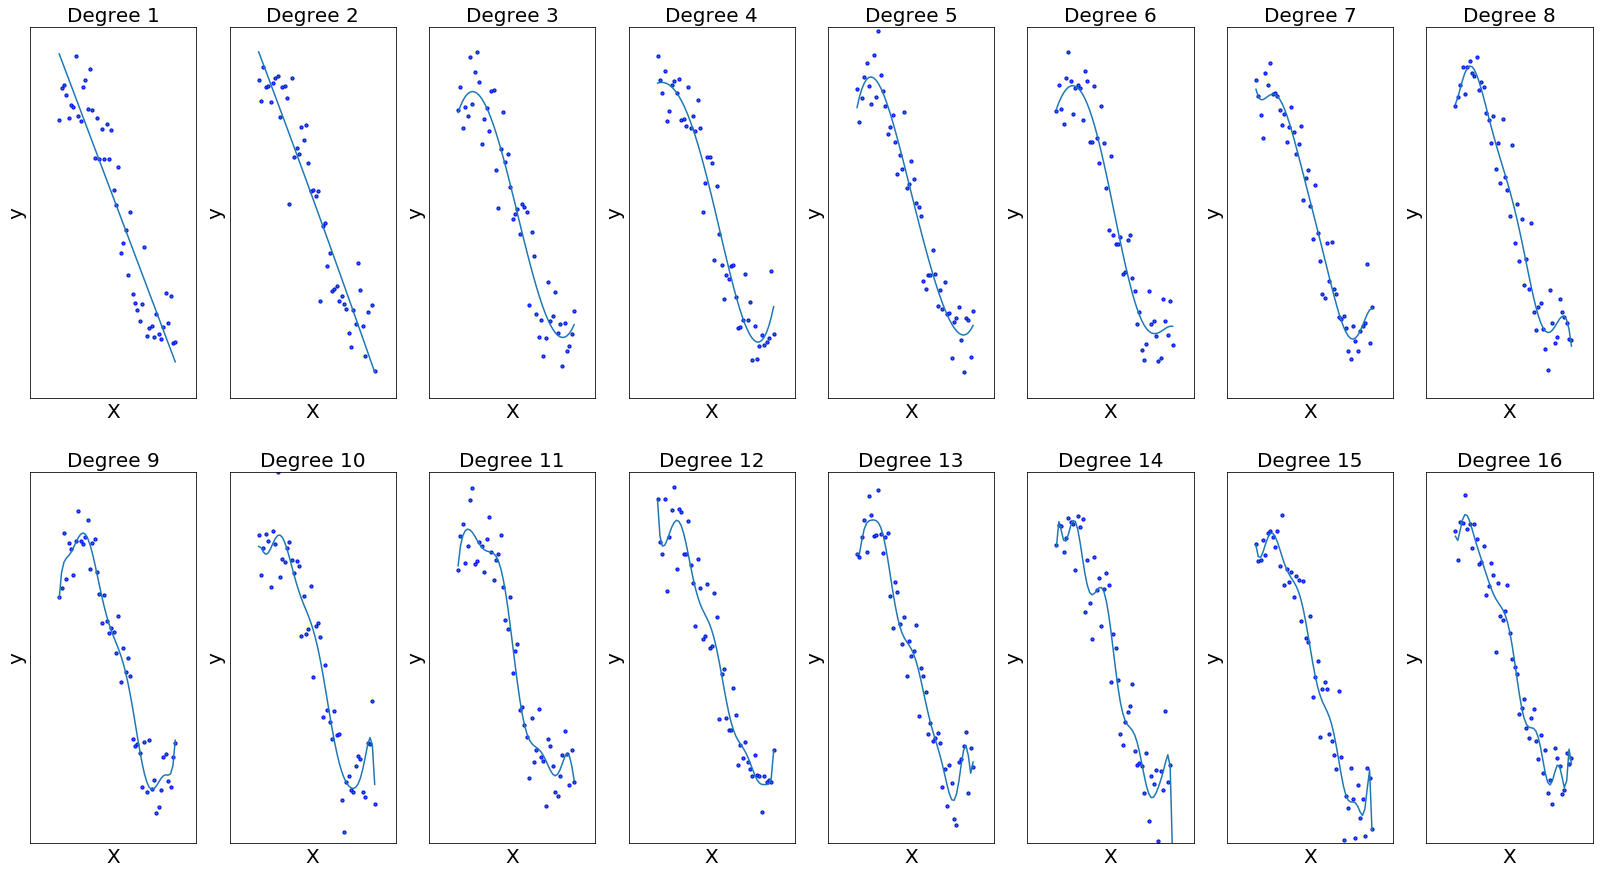

In [366]:
###OLS的拟合方法
#degrees = [1,3, 6, 9, 12, 15]
degrees = [1,2,3,4,5, 6,7,8, 9,10,11, 12,13,14, 15,16]
#degrees = [1]
plt.figure(figsize=(28, 15))
res=[]
for i in range(len(degrees)):
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())
    X, y = load_data()
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print(linear_regression.coef_)
    
    X_test = np.linspace(1/3*math.pi, 5/3*math.pi, 50)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #plt.plot(X_test, np.sin(X_test), label="True function")
    
    plt.scatter(X, y, edgecolor='b', s=10, label="Samples")
    plt.xlabel("X",fontsize=20)
    plt.ylabel("y",fontsize=20)
    plt.xlim((0, 6))
    plt.ylim((-1.5, 1.5))
    #plt.title('A simple plot')
    plt.title("Degree {}".format(degrees[i]),fontsize=20)
    res.append(linear_regression.coef_)
pd.DataFrame(res).to_csv('OLS.csv')
plt.show()

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

[ 1.21036020e+00 -3.61307215e-01 -1.80525427e-02  1.16343237e-03
  5.05691535e-04  9.31289686e-05  1.28223929e-05  1.32620961e-06
  5.70533888e-08 -2.01639438e-08 -8.55977711e-09 -2.33751610e-09]
[ 1.25459035e+00 -3.86229754e-01 -1.97285834e-02  1.35212247e-03
  5.96665714e-04  1.12552514e-04  1.57811718e-05  1.64047710e-06
  6.56505485e-08 -2.69644904e-08 -1.10155354e-08 -2.93060629e-09]
[ 1.68847806e+00 -4.64960101e-01 -2.94397771e-02  8.05462702e-04
  7.23639303e-04  1.64460323e-04  2.70568979e-05  3.39848768e-06
  2.36996260e-07 -3.54841555e-08 -2.12859851e-08 -6.53675986e-09]
[ 8.67448911e-01 -3.39059457e-01 -1.58682976e-02  1.31072931e-03
  5.24906203e-04  9.89160906e-05  1.42596302e-05  1.58180324e-06
  8.61846553e-08 -2.03491394e-08 -9.82048292e-09 -2.79592611e-09]
[ 1.28630844e+00 -3.87971231e-01 -1.92629658e-02  1.31885152e-03
  5.66042070e-04  1.04444360e-04  1.42683635e-05  1.43015013e-06
  5.05450773e-08 -2.38052736e-08 -9.13501333e-09 -2.32391042e-09]
[ 1.38861063e+00 -3.

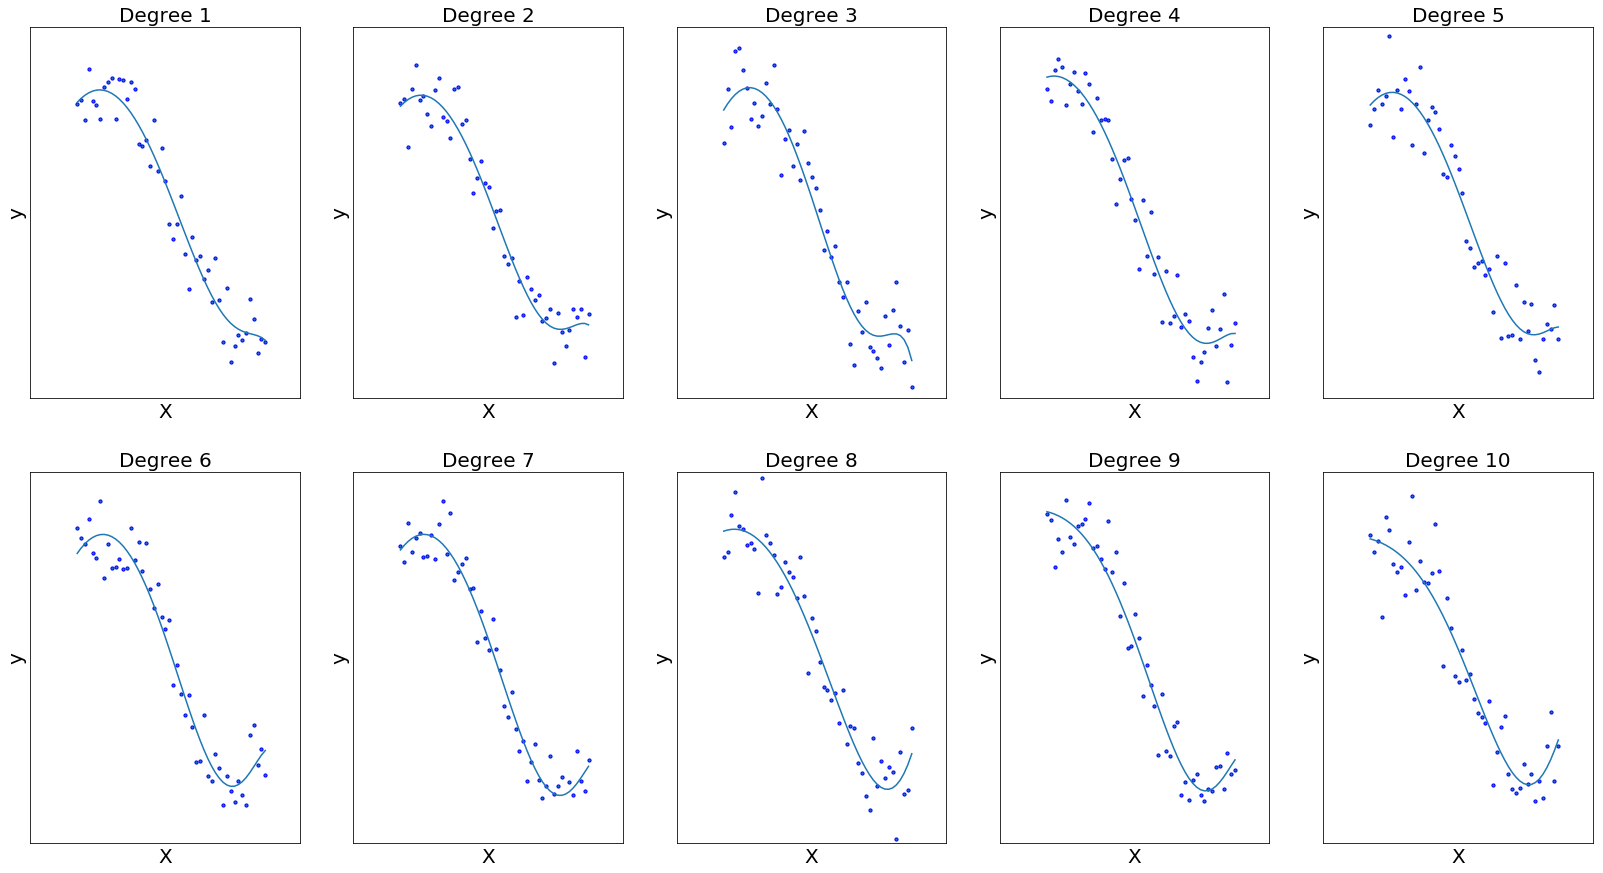

In [368]:
###Lasso的
alpha = [1e-12,1e-10,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]

plt.figure(figsize=(28, 15))
res = []
for i in range(len(alpha)):
    ax = plt.subplot(2, len(alpha)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())
    X, y = load_data()
    polynomial_features = PolynomialFeatures(degree=12, include_bias=False)
    #linear_regression = LinearRegression()
    lasso = Lasso(alpha=alpha[i])
    pipeline = Pipeline([("polynomial_features", polynomial_features),("lasso", lasso)])
    pipeline.fit(X[:, np.newaxis], y)
    print(lasso.coef_)
    
    X_test = np.linspace(1/3*math.pi, 5/3*math.pi, 50)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #plt.plot(X_test, np.sin(X_test), label="True function")
    
    plt.scatter(X, y, edgecolor='b', s=10, label="Samples")
    plt.xlabel("X",fontsize=20)
    plt.ylabel("y",fontsize=20)
    plt.xlim((0, 6))
    plt.ylim((-1.5, 1.5))
    #plt.title('A simple plot')
    plt.title("Degree {}".format(degrees[i]),fontsize=20)
    res.append(lasso.coef_)
pd.DataFrame(res).to_csv('Lasso.csv')
plt.show()

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.280712e-27
  overwrite_a=True).T
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.245548e-27
  overwrite_a=True).T
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.537553e-26
  overwrite_a=True).T
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal con

[-1.08631940e+03  1.96652418e+03 -2.09889373e+03  1.46128624e+03
 -6.85139516e+02  2.12139762e+02 -3.89557334e+01  2.23831405e+00
  7.23848918e-01 -1.91490150e-01  1.91997247e-02 -7.40242552e-04]
[ 1.12684711e+03 -1.79243887e+03  1.53970611e+03 -7.67439285e+02
  2.16488123e+02 -2.85956229e+01  5.91514954e-01 -5.04255393e-01
  4.04497632e-01 -9.50079269e-02  9.87535163e-03 -3.96154868e-04]
[-1.23210739e+02  1.18114390e+02  4.13953656e+01 -1.72442143e+02
  1.52576923e+02 -6.81928750e+01  1.56785997e+01 -9.13602060e-01
 -4.40992184e-01  1.20418850e-01 -1.26372789e-02  5.05137363e-04]
[-4.89192678e+00 -5.02799936e+01  6.99622460e+01 -2.34058423e+01
 -1.77835498e+01  2.02007033e+01 -8.64087686e+00  1.95571393e+00
 -2.22646894e-01  5.69797990e-03  1.20815817e-03 -8.83681718e-05]
[-2.22397156e+01 -2.53080835e+01  3.20493520e+01  2.22938763e+01
 -4.75468686e+01  2.70942904e+01 -5.81702362e+00 -5.61737686e-01
  5.79228317e-01 -1.29432774e-01  1.31852698e-02 -5.29299688e-04]
[ 1.03544486e+00 -2.

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.165610e-18
  overwrite_a=True).T
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.430306e-18
  overwrite_a=True).T


[-5.75930763e-04 -3.11893956e-03 -7.27153047e-03 -9.71952117e-03
 -4.66345299e-03  7.87547058e-03  9.13546333e-03 -1.45323068e-02
  7.00740551e-03 -1.59658726e-03  1.77328434e-04 -7.75677571e-06]
[-4.73423606e-03 -1.91835097e-02 -3.88187415e-02 -4.60933269e-02
 -1.63832555e-02  4.27396261e-02  4.19378958e-02 -6.88953227e-02
  3.40308517e-02 -8.07600709e-03  9.46166179e-04 -4.40214717e-05]


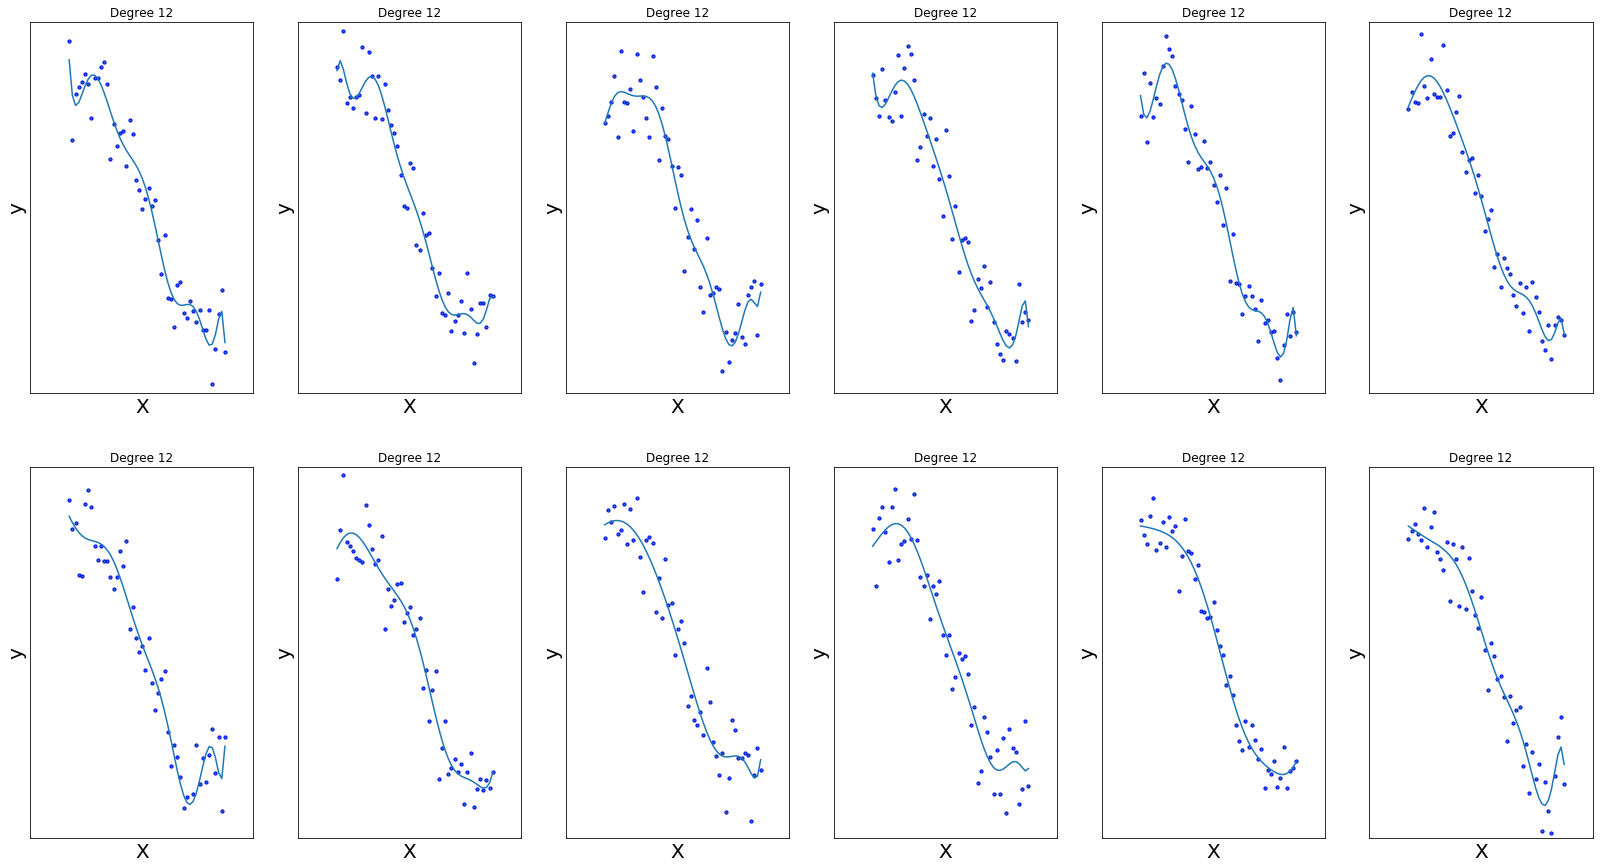

In [369]:
###Ridge
alpha = [1e-12,1e-10,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2]

plt.figure(figsize=(28, 15))
res = []  
for i in range(len(alpha)):
    ax = plt.subplot(2, len(alpha)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())
    X, y = load_data()
    polynomial_features = PolynomialFeatures(degree=12, include_bias=False)
    #linear_regression = LinearRegression()
    ridge = Ridge(alpha=alpha[i])
    pipeline = Pipeline([("polynomial_features", polynomial_features),("Ridge", ridge)])
    pipeline.fit(X[:, np.newaxis], y)
    print(ridge.coef_)
    
    X_test = np.linspace(1/3*math.pi, 5/3*math.pi, 50)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #plt.plot(X_test, np.sin(X_test), label="True function")
    
    plt.scatter(X, y, edgecolor='b', s=10, label="Samples")
    plt.xlabel("X",fontsize=20)
    plt.ylabel("y",fontsize=20)
    plt.xlim((0, 6))
    plt.ylim((-1.5, 1.5))
    #plt.title('A simple plot')
    plt.title("Degree {}".format(12,fontsize=20))
    res.append(ridge.coef_)
pd.DataFrame(res).to_csv('ridge.csv')
plt.show()

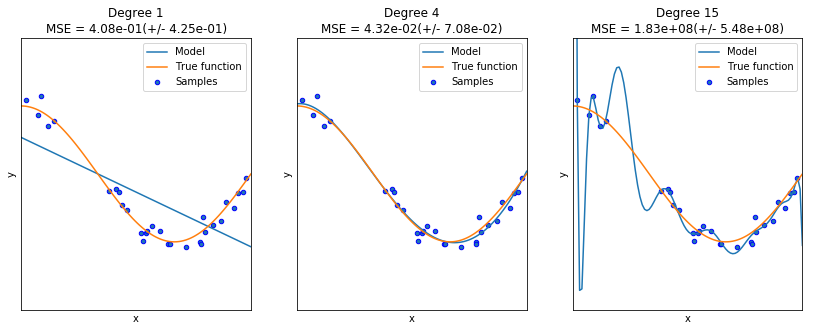

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()